In [15]:
# Required Python Packages
import pandas as pd
import numpy as np
from sklearn import tree
# creating dataset for modeling Apple / Orange classification
fruit_data_set = pd.DataFrame()
fruit_data_set["fruit"] = np.array([1, 1, 1, 1, 1,      # 1 for apple
                                    0, 0, 0, 0, 0])     # 0 for orange
fruit_data_set["weight"] = np.array([170, 175, 180, 178, 182,
                                     130, 120, 130, 138, 145])
fruit_data_set["smooth"] = np.array([9, 10, 8, 8, 7,
                                     3, 4, 2, 5, 6])

fruit_classifier = tree.DecisionTreeClassifier()
fruit_classifier.fit(fruit_data_set[["weight", "smooth"]], fruit_data_set["fruit"])

print(">>>>> Trained fruit_classifier <<<<<")
print(fruit_classifier)

>>>>> Trained fruit_classifier <<<<<
DecisionTreeClassifier()


In [16]:
# fruit data set 1st observation
test_features_1 = [[fruit_data_set["weight"][1], fruit_data_set["smooth"][1]]]
test_features_1_fruit = fruit_classifier.predict(test_features_1)
print ("Actual fruit type: {act_fruit} , Fruit classifier predicted: {predicted_fruit}".format(
    act_fruit=fruit_data_set["fruit"][0], predicted_fruit=test_features_1_fruit))

Actual fruit type: 1 , Fruit classifier predicted: [1]


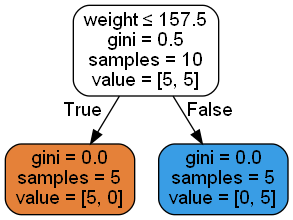

In [17]:
##from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
with open("fruit_classifier.txt", "w") as f:
    f = tree.export_graphviz(fruit_classifier, out_file=f)

dot_data = StringIO()
export_graphviz(fruit_classifier, out_file=dot_data,   filled=True, rounded=True, special_characters=True,feature_names=fruit_data_set.columns[1:], impurity=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [11]:
#df.head()
#iris

In [18]:
import pandas as pd
# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\pydata\\diabetes.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']

print(df.head(5)) 

print(df.ndim)

print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
2
(768, 9)


In [19]:
# Using Skicit-learn to split data into training and testing sets
dfInput = df.iloc[:,0:8] 
print(dfInput.head())
dfoutput = df.iloc[:,-1]
print(dfoutput.head())


split = int(0.8*len(df))
X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [27]:


clf = tree.DecisionTreeClassifier(max_depth=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7272727272727273


In [28]:
#ConfusionMatrix
print(metrics.confusion_matrix(Y_test , y_pred))

[[93  6]
 [36 19]]


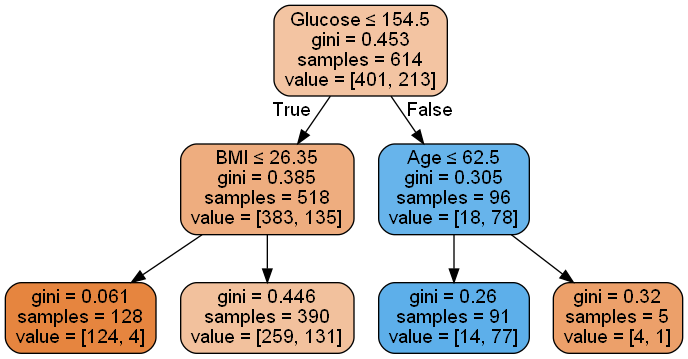

In [29]:
##from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
with open("fruit_classifier.txt", "w") as f:
    f = tree.export_graphviz(fruit_classifier, out_file=f)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,   filled=True, rounded=True, special_characters=True,
                feature_names=dfInput.columns[0:], impurity=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

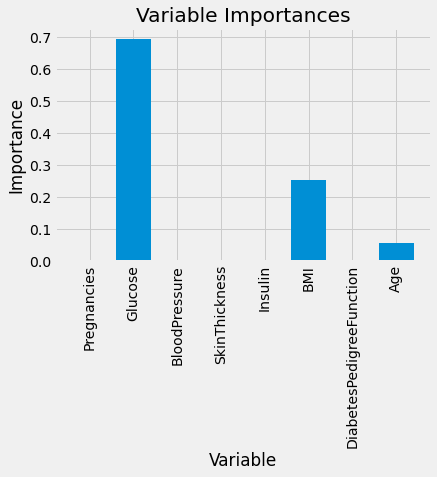

In [32]:
# Get numerical feature importances
importances = list(clf.feature_importances_)

features= dfInput
# Saving feature names for later use
feature_list = list(dfInput.columns)
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [33]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Glucose              Importance: 0.69
Variable: BMI                  Importance: 0.25
Variable: Age                  Importance: 0.06
Variable: Pregnancies          Importance: 0.0
Variable: BloodPressure        Importance: 0.0
Variable: SkinThickness        Importance: 0.0
Variable: Insulin              Importance: 0.0
Variable: DiabetesPedigreeFunction Importance: 0.0
